# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [161]:
import pandas as pd

data = pd.read_csv('data/Advertising.csv')
data.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [163]:
data['sales'].max()

27.0

**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [78]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [79]:
import numpy as np

data_df = data.copy()

X = (data_df.drop(['Unnamed: 0','sales'], axis=1)).values
X = np.array(X)
y = data_df[['sales']]
y = np.array(y)

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [80]:
import numpy as np

X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [81]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

$$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [82]:
num_iters = 1000 #количество итераций
m = X.shape[0]# количество строк в матрице X
n = X.shape[1]# количество столбцов в матрице X
w = np.zeros((n,1))#вектор размера nx1, состояющий из нулей


for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum(((X @ w) - y) ** 2)/(len(y))

In [83]:
print(w.reshape(1,4))

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [84]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

*Результаты получившиеся в результате использования алгоритма координатного спуска и с реализацией линейной регрессии из библиотеки sklearn совпадают*

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [97]:
data_df = data.copy()

X = np.array((data_df.drop(['Unnamed: 0','sales'], axis=1)).values)
y = np.array(data_df[['sales']])
y = y.reshape(-1, 1)

X = (X - np.mean(X))/ np.std(X)

**Добавим единичный столбец**

In [98]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [111]:
def mse_error(y_real, y_pred):
    """Функция вычисляет среднеквадратичную ошибку
    Args:
        y_real - реальные значения
        y_pred - предсказанные значения
    Returns:
        значение mse
    """
    # Проверим на одинаковую длину массивов
    #if len(y_real) != len(y_pred):
        #raise ValueError("Массивы y_real и y_pred должны иметь одинаковую длину")
    # возвращаем среднеквадратичную ошибку
    return np.mean((y_real-y_pred)**2) 

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [112]:
# Вычислим среднее значение продажи
y_pred = np.mean(y)

# рассчитаем среднеквадратичную ошибку
print(f"MSE: {mse_error(y, y_pred):.1f}")

MSE: 27.1


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [113]:
def lin_pred(X, w):
    """Функция вычисляет вектор прогнозов
    Args:
        X - матрица признаков
        w - вектор весов линейной модели
    Returns:
        вектор прогнозов
    """
    # Вычислим вектор прогнозов
    y_pred = np.dot(X, w)
    # Возвратим вектор прогнозов
    return y_pred

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [114]:
def stoch_grad_step(X, y, w, train_ind, eta):
    """Функция получит вектор обновленных весов
    
    Args:
        X - матрица признаков
        y - целевая переменная
        w - вектор весов линейной модели
        train_ind - индекс объекта обучающей выборки (строки матрицы X)
        eta - шаг градиентного спуска"""
    vect = (X[train_ind]*2*((X[train_ind]@ w) - y[train_ind])/len(y))
    new_w = w - vect*eta
    return new_w

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [166]:
def stochastic_gradient_descent(X, y, w, eta, max_iter, E_dist):
    """Функция вычисляет вектор весов и вектор ошибок
        Аргументы:
        X - матрица признаков
        y - целевая переменная
        w - вектор весов линейной модели
        eta - Параметр, определяющий темп обучения(шаг градиентного спуска)
        max_iter - максимальное число итераций
        E_dist - евклидово расстояние, при котором алгоритм прекратит работу"""
    #расстояние между векторами весов на соседних итерациях 
    distance = np.inf
    #список для фиксации ошибок
    error_list = []
    #счетчик итераций
    count_iter = 0
    while distance>E_dist and count_iter < max_iter:
        # сгенерируем случайный индекс
        train_ind = np.random.randint(X.shape[0])
        # запишем в переменную текущий шаг стохастического спуска с использованием функции stoch_grad_step
        w = stoch_grad_step(X, y, w, train_ind, eta)
        # рассчитаем текущее расстояние между векторами весов
        distance = np.linalg.norm(w)
        # запишем текущую ошибку в вектор ошибок
        error_list.append(mse_error(y, np.dot(X,w)))
        #прибавляем к счетчику итерацию
        count_iter +=1
    return w, error_list

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [180]:
# запускаем функцию
w = np.zeros(X.shape[1])
max_iter = 100000
eta = 0.01
w_stoch, errors_stoch = stochastic_gradient_descent(X, y, w, eta, max_iter, 0.0001)

**Постройте график зависимости ошибки от номера итерации**

<Axes: title={'center': 'Errors'}, xlabel='count_iter', ylabel='mse_error'>

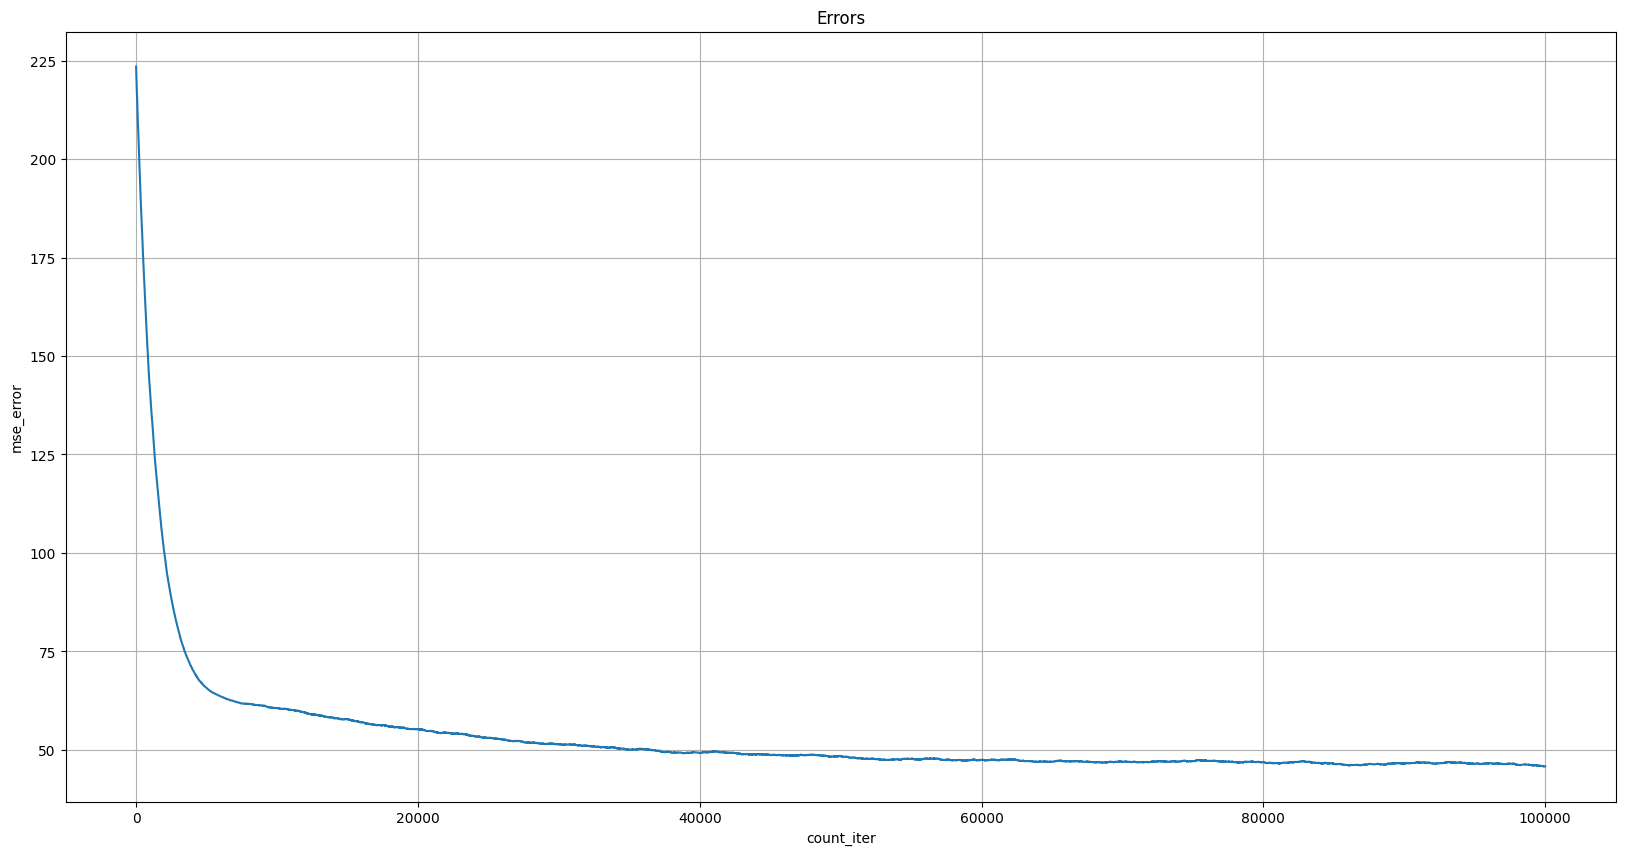

In [181]:
# Создадим Series для построения графика
errors = pd.Series(
data = errors_stoch,
index = list(range(0,len(errors_stoch))),
name = 'errors'
)
errors.plot(kind='line', figsize=(20, 10), grid=True, xlabel='count_iter', ylabel='mse_error', title='Errors')

*График зависимости ошибки от номера итерации показывает, что при увеличении кол-ва итераций происходит уменьшение ошибки. До величины 10000 итераций снижение происходит динамично, далее более плавно. После 60000 итераций изменение ошибки практически не происходит*

**Выведите вектор весов, к которому сошелся метод.**

In [182]:
print('Вектор весов, к которому сошелся метод:', w_stoch)

Вектор весов, к которому сошелся метод: [ 9.59105175  3.85832345  0.51334063 -0.5896249 ]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [183]:
print('Cреднеквадратичная ошибка на последней итерации:', round(errors_stoch[len(errors_stoch)-1]))

Cреднеквадратичная ошибка на последней итерации: 46


*При использовании стохастического градиентного спуска значение mse показало хуже результат, чем при использовании предсказания по среднему значению. Могу предположить, что модель застряла в локальном минимуме. Изменение шага в пределах от 1 до 0.001 не позволило перескочить этот минимум и улучшить значение mse*